<a href="https://colab.research.google.com/github/yushendye/AerialInspection/blob/main/YOLO_v4CSP_7_Oct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# clone Scaled_YOLOv4
!git clone https://github.com/roboflow-ai/ScaledYOLOv4.git  # clone repo
%cd /content/ScaledYOLOv4/
#checkout the yolov4-large branch
!git checkout yolov4-large

Cloning into 'ScaledYOLOv4'...
remote: Enumerating objects: 128, done.
remote: Total 128 (delta 0), reused 0 (delta 0), pack-reused 128
Receiving objects: 100% (128/128), 389.37 KiB | 3.71 MiB/s, done.
Resolving deltas: 100% (39/39), done.
/content/ScaledYOLOv4
Branch 'yolov4-large' set up to track remote branch 'yolov4-large' from 'origin'.
Switched to a new branch 'yolov4-large'


In [3]:
import torch
print('Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Using torch 1.9.0+cu102 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [4]:
#install mish activation funciton for cuda
%cd /content/
!git clone https://github.com/JunnYu/mish-cuda
%cd mish-cuda
!python setup.py build install

/content
Cloning into 'mish-cuda'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 195 (delta 7), reused 79 (delta 3), pack-reused 107
Receiving objects: 100% (195/195), 208.77 KiB | 2.86 MiB/s, done.
Resolving deltas: 100% (56/56), done.
/content/mish-cuda
/usr/lib/python3.7/distutils/extension.py:131: UserWarning: Unknown Extension options: 'headers'
  warnings.warn(msg)
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/mish_cuda
copying src/mish_cuda/__init__.py -> build/lib.linux-x86_64-3.7/mish_cuda
running egg_info
creating src/mish_cuda.egg-info
writing src/mish_cuda.egg-info/PKG-INFO
writing dependency_links to src/mish_cuda.egg-info/dependency_links.txt
writing requirements to src/mish_cuda.egg-info/requires.txt
writing top-level names to src/mish_cuda.egg-info/top_level.txt
writing manifest file 'src/mish_cu

In [5]:
!pip install -U PyYAML

     |████████████████████████████████| 636 kB 5.4 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
%cd /content/ScaledYOLOv4/
!python train.py --help

/content/ScaledYOLOv4
usage: train.py [-h] [--weights WEIGHTS] [--cfg CFG] [--data DATA] [--hyp HYP]
                [--epochs EPOCHS] [--batch-size BATCH_SIZE]
                [--img-size IMG_SIZE [IMG_SIZE ...]] [--rect]
                [--resume [RESUME]] [--nosave] [--notest] [--noautoanchor]
                [--evolve] [--bucket BUCKET] [--cache-images] [--name NAME]
                [--device DEVICE] [--multi-scale] [--single-cls] [--adam]
                [--sync-bn] [--local_rank LOCAL_RANK] [--logdir LOGDIR]

optional arguments:
  -h, --help            show this help message and exit
  --weights WEIGHTS     initial weights path
  --cfg CFG             model.yaml path
  --data DATA           data.yaml path
  --hyp HYP             hyperparameters path, i.e. data/hyp.scratch.yaml
  --epochs EPOCHS
  --batch-size BATCH_SIZE
                        total batch size for all GPUs
  --img-size IMG_SIZE [IMG_SIZE ...]
                        train,test sizes
  --rect                rectan

In [6]:
!cp -r /content/drive/MyDrive/ScaledYolo_Data /content/

In [ ]:
!cp -r /content/ScaledYOLOv4 /content/drive/MyDrive/Scaled_YOLOv4/

In [7]:
%cd /content/ScaledYOLOv4/
!python train.py --img 415 --batch 4 --epochs 2000 --data /content/ScaledYOLOv4/data/coco.yaml --cfg /content/ScaledYOLOv4/models/yolov4-csp.yaml --weights '/content/drive/MyDrive/7_Oct_CSP_2/exp0_yolov4-csp-results/weights/last.pt' --name yolov4-csp-results --logdir '/content/drive/MyDrive/7_Oct_CSP_3/'

/content/ScaledYOLOv4
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Namespace(adam=False, batch_size=4, bucket='', cache_images=False, cfg='/content/ScaledYOLOv4/models/yolov4-csp.yaml', data='/content/ScaledYOLOv4/data/coco.yaml', device='', epochs=2000, evolve=False, global_rank=-1, hyp='data/hyp.finetune.yaml', img_size=[415, 415], local_rank=-1, logdir='/content/drive/MyDrive/7_Oct_CSP_3/', multi_scale=False, name='yolov4-csp-results', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, sync_bn=False, total_batch_size=4, weights='/content/drive/MyDrive/7_Oct_CSP_2/exp0_yolov4-csp-results/weights/last.pt', world_size=1)
Start Tensorboard with "tensorboard --logdir /content/drive/MyDrive/7_Oct_CSP_3/", view at http://localhost:6006/
Hyperparameters {'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gam

In [8]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
%cd /content/ScaledYOLOv4/
!python detect.py --weights /content/drive/MyDrive/7_Oct_CSP_3/exp0_yolov4-csp-results/weights/last_1999.pt --img 416 --conf 0.4 --source /content/ScaledYolo_Data/val

/content/ScaledYOLOv4
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=416, iou_thres=0.5, output='inference/output', save_txt=False, source='/content/ScaledYolo_Data/val', update=False, view_img=False, weights=['/content/drive/MyDrive/7_Oct_CSP_3/exp0_yolov4-csp-results/weights/last_1999.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Fusing layers... Model Summary: 235 layers, 5.24813e+07 parameters, 5.04494e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
image 1/53 /content/ScaledYolo_Data/val/04_3420.jpg: 416x416 1 tower_lattices, Don

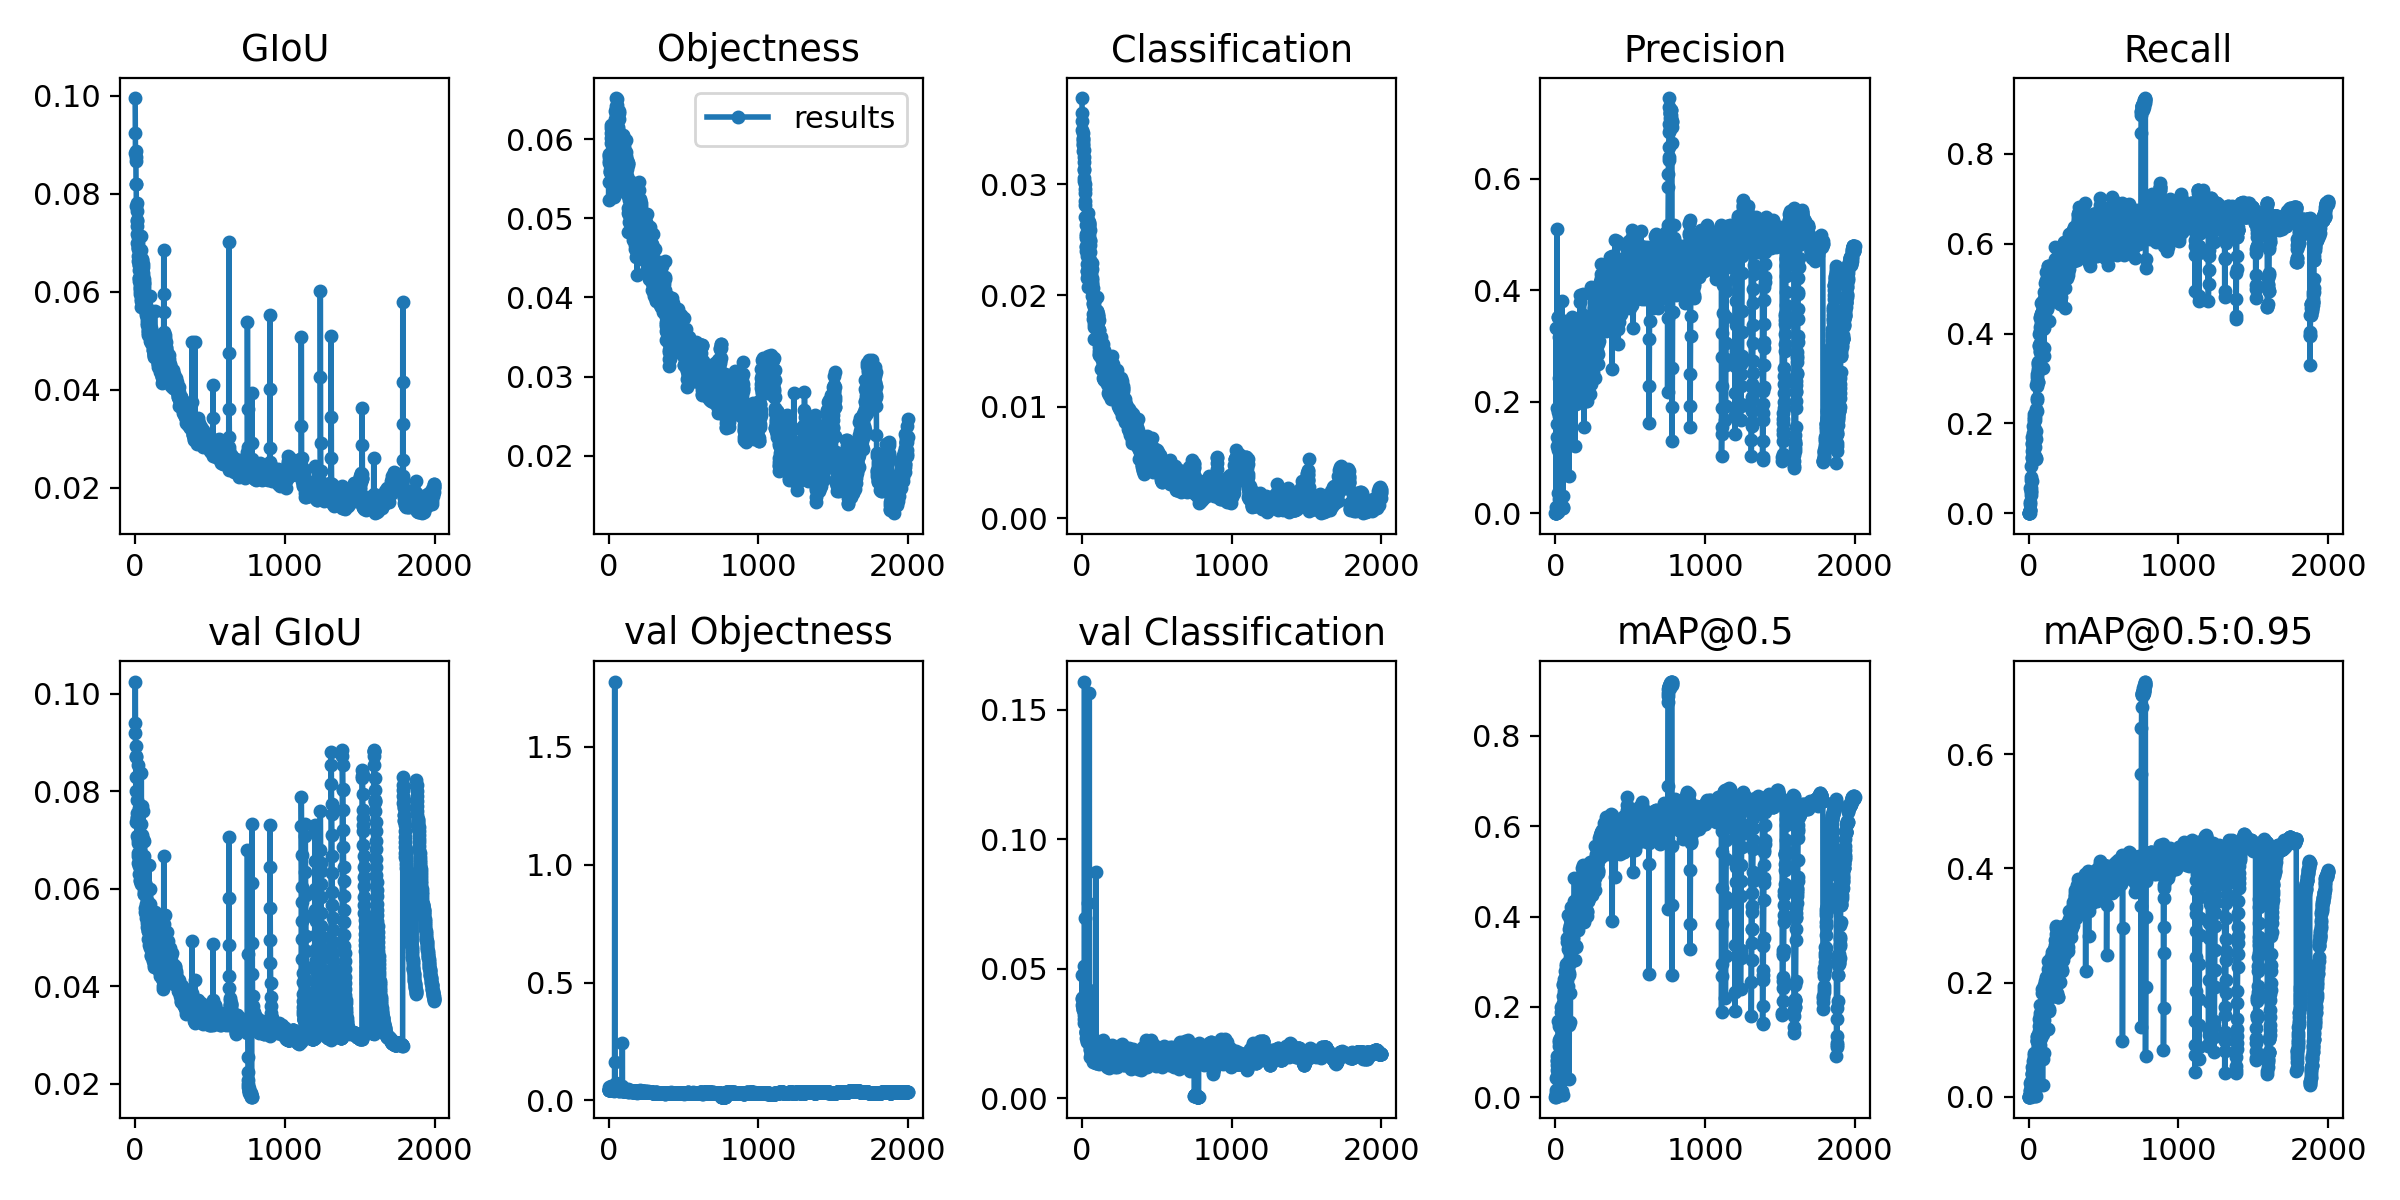

In [9]:
from IPython.display import Image, display
display(Image('/content/drive/MyDrive/7_Oct_CSP_3/exp0_yolov4-csp-results/results.png'))  # view results.png

In [ ]:
!python /content/ScaledYOLOv4/test.py --help

usage: test.py [-h] [--weights WEIGHTS [WEIGHTS ...]] [--data DATA]
               [--batch-size BATCH_SIZE] [--img-size IMG_SIZE]
               [--conf-thres CONF_THRES] [--iou-thres IOU_THRES] [--save-json]
               [--task TASK] [--device DEVICE] [--single-cls] [--augment]
               [--merge] [--verbose] [--save-txt]

optional arguments:
  -h, --help            show this help message and exit
  --weights WEIGHTS [WEIGHTS ...]
                        model.pt path(s)
  --data DATA           *.data path
  --batch-size BATCH_SIZE
                        size of each image batch
  --img-size IMG_SIZE   inference size (pixels)
  --conf-thres CONF_THRES
                        object confidence threshold
  --iou-thres IOU_THRES
                        IOU threshold for NMS
  --save-json           save a cocoapi-compatible JSON results file
  --task TASK           'val', 'test', 'study'
  --device DEVICE       cuda device, i.e. 0 or 0,1,2,3 or cpu
  --single-cls          treat 

In [10]:
!python /content/ScaledYOLOv4/test.py --img 415 --conf 0.001 --iou 0.65 --batch 8 --device 0 --data /content/ScaledYOLOv4/data/coco.yaml --weights /content/drive/MyDrive/7_Oct_CSP_3/exp0_yolov4-csp-results/weights/last_1999.pt --verbose

Namespace(augment=False, batch_size=8, conf_thres=0.001, data='/content/ScaledYOLOv4/data/coco.yaml', device='0', img_size=415, iou_thres=0.65, merge=False, save_json=True, save_txt=False, single_cls=False, task='val', verbose=True, weights=['/content/drive/MyDrive/7_Oct_CSP_3/exp0_yolov4-csp-results/weights/last_1999.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Fusing layers... Model Summary: 235 layers, 5.24813e+07 parameters, 5.04494e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Scanning labels /content/ScaledYolo_Data/train.cache (394 found, 0 missing, 0 empty, 0 duplicate, 

In [11]:
#test data
!python /content/ScaledYOLOv4/test.py --img 415 --conf 0.001 --iou 0.65 --batch 8 --device 0 --data /content/ScaledYOLOv4/data/coco.yaml --weights /content/drive/MyDrive/7_Oct_CSP_3/exp0_yolov4-csp-results/weights/last_1999.pt --verbose

Namespace(augment=False, batch_size=8, conf_thres=0.001, data='/content/ScaledYOLOv4/data/coco.yaml', device='0', img_size=415, iou_thres=0.65, merge=False, save_json=True, save_txt=False, single_cls=False, task='val', verbose=True, weights=['/content/drive/MyDrive/7_Oct_CSP_3/exp0_yolov4-csp-results/weights/last_1999.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Fusing layers... Model Summary: 235 layers, 5.24813e+07 parameters, 5.04494e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Scanning images: 100% 123/123 [00:00<00:00, 439.61it/s]
Scanning labels /content/ScaledYolo_Data/t

In [12]:
#val data
!python /content/ScaledYOLOv4/test.py --img 415 --conf 0.001 --iou 0.65 --batch 8 --device 0 --data /content/ScaledYOLOv4/data/coco.yaml --weights /content/drive/MyDrive/7_Oct_CSP_3/exp0_yolov4-csp-results/weights/last_1999.pt --verbose

Namespace(augment=False, batch_size=8, conf_thres=0.001, data='/content/ScaledYOLOv4/data/coco.yaml', device='0', img_size=415, iou_thres=0.65, merge=False, save_json=True, save_txt=False, single_cls=False, task='val', verbose=True, weights=['/content/drive/MyDrive/7_Oct_CSP_3/exp0_yolov4-csp-results/weights/last_1999.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Fusing layers... Model Summary: 235 layers, 5.24813e+07 parameters, 5.04494e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Scanning labels /content/ScaledYolo_Data/val.cache (53 found, 0 missing, 0 empty, 0 duplicate, for